In [1]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\nithe\Downloads\ml_project_dataset.xlsx"
dataset = pd.read_excel(file_path)

dataset.drop(['Name'], axis=1, inplace=True)

dataset.head(5)

,Age,Gender,Marital status,Occupation,Average daily working hours,Working days per week,Job satisfaction,Breaks during work,Overtime Frequency (How often you work ovetime),Daily leisure time,Sleep hours,Time spent with family,Mental Health,Physical Health,Rate your fitness level,Work-life Balance satisfaction,Time spent for hobbies per day,Average Screen time,Exercise frequency,Daily stress level
0,2,2,1,1,2,1,2,3,3,2,1,2,2,3,3,1,2,2,3,3
1,2,2,1,1,1,1,5,3,2,1,1,1,5,4,5,5,4,2,3,2
2,2,1,1,1,2,2,3,2,1,2,3,1,1,1,1,1,4,2,0,3
3,2,1,1,1,1,2,3,1,1,1,1,3,3,3,3,3,1,2,3,5
4,2,1,1,1,3,3,3,4,2,3,2,1,4,3,3,3,2,3,1,4


In [3]:
num_synthetic_samples = 1870 

synthetic_data = dataset.apply(lambda x: np.random.choice(x, size=num_synthetic_samples, replace=True))

augmented_data = pd.concat([dataset, synthetic_data], ignore_index=True)

output_file_path = 'augmented_ml_project_dataset_new.xlsx'
augmented_data.to_excel(output_file_path, index=False)

print("Synthetic data generated and saved to:", output_file_path)

Synthetic data generated and saved to: augmented_ml_project_dataset_new.xlsx


In [5]:
from IPython.display import FileLink

FileLink(output_file_path)

C:\Users\nithe\3-1\ML Project trails\augmented_ml_project_dataset_new.xlsx

In [36]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency

data = pd.read_excel(r"C:\Users\nithe\Downloads\augmented_ml_project_dataset_new.xlsx")

target_variable = 'Daily stress level'

categorical_features = data.columns.drop(target_variable)
data_encoded = data.copy()

for col in categorical_features:
    data_encoded[col] = LabelEncoder().fit_transform(data[col])

data_encoded[target_variable] = LabelEncoder().fit_transform(data[target_variable])

chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(data_encoded[feature], data_encoded[target_variable])
    
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results[feature] = {'Chi2 Statistic': chi2_stat, 'p-value': p_val}

chi2_results_df = pd.DataFrame(chi2_results).T  # Transpose for better readability
print(chi2_results_df)

significant_features = chi2_results_df[chi2_results_df['p-value'] < 0.05]
print("\nSignificant features (p < 0.05):")
print(significant_features)

                                                 Chi2 Statistic   p-value
Age                                                    5.791093  0.670619
Gender                                                 4.260885  0.832852
Marital status                                         2.749791  0.600530
Occupation                                            18.738901  0.538851
Average daily working hours                           12.235959  0.140982
Working days per week                                 11.805665  0.160088
Job satisfaction                                      11.492283  0.778129
Breaks during work                                    10.593223  0.564063
Overtime Frequency (How often you work ovetime)        4.462997  0.813124
Daily leisure time                                     2.174714  0.975182
Sleep hours                                            2.269953  0.971597
Time spent with family                                11.660690  0.166997
Mental Health                         

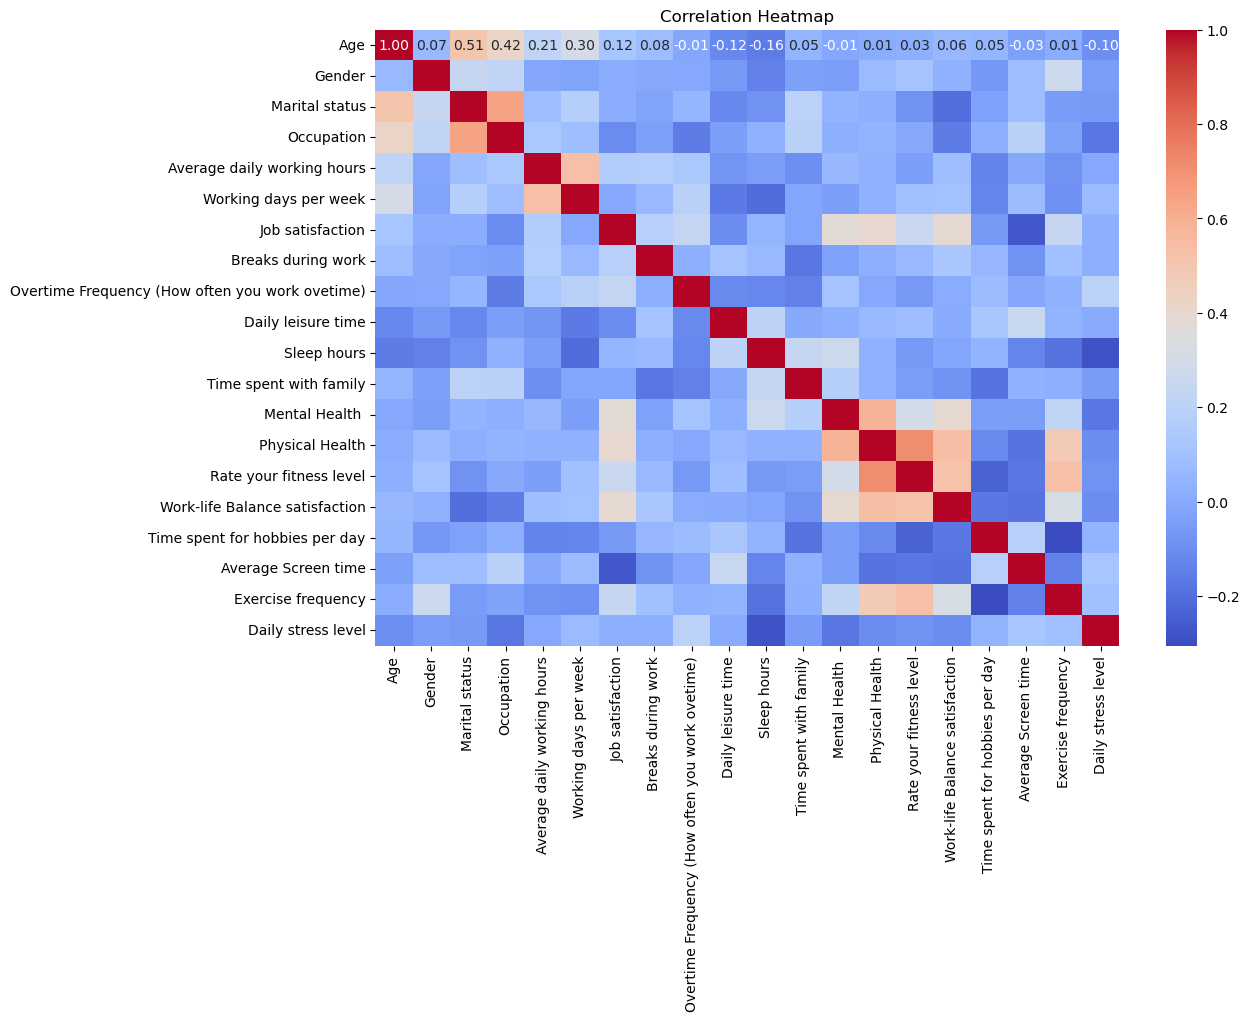

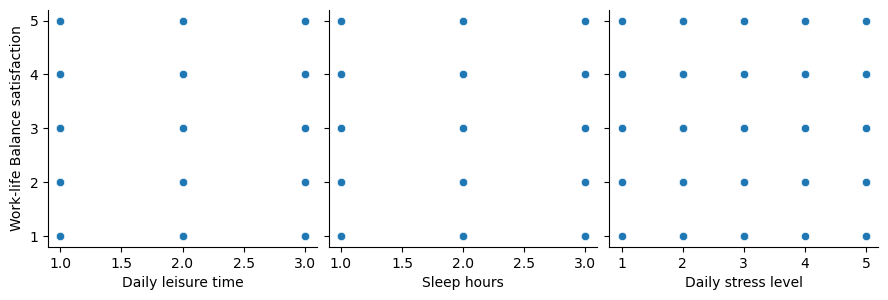

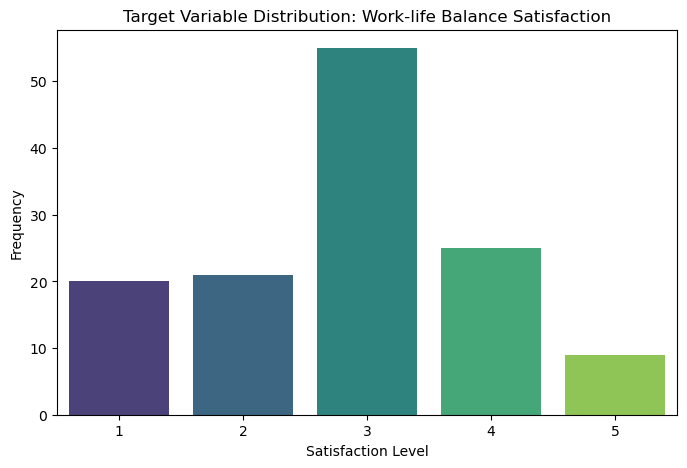

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(dataset, y_vars=["Work-life Balance satisfaction"], 
             x_vars=["Daily leisure time", "Sleep hours", "Daily stress level"], 
             kind="scatter", height=3)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="Work-life Balance satisfaction", data=dataset, palette="viridis")
plt.title("Target Variable Distribution: Work-life Balance Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["Work-life Balance satisfaction"])
y = dataset["Work-life Balance satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (104, 19)
Testing set size: (26, 19)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Assuming your dataset is preprocessed into X (features) and y (target)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)

# Evaluation Metrics
print("Logistic Regression Metrics:")
print(classification_report(y_test, log_reg_preds))
print("Accuracy:", accuracy_score(y_test, log_reg_preds))

print("\nDecision Tree Metrics:")
print(classification_report(y_test, decision_tree_preds))
print("Accuracy:", accuracy_score(y_test, decision_tree_preds))

print("\nRandom Forest Metrics:")
print(classification_report(y_test, random_forest_preds))
print("Accuracy:", accuracy_score(y_test, random_forest_preds))

# Confusion Matrix Example for Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, random_forest_preds))

# Cross-Validation for Random Forest
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring="f1_macro")
print("\nCross-Validation F1 Macro Scores:", cv_scores)
print("Average F1 Macro Score:", np.mean(cv_scores))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.20      0.33      0.25         3
           3       0.44      0.29      0.35        14
           4       0.20      0.14      0.17         7
           5       0.00      0.00      0.00         0

    accuracy                           0.27        26
   macro avg       0.21      0.25      0.21        26
weighted avg       0.33      0.27      0.28        26

Accuracy: 0.2692307692307692

Decision Tree Metrics:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.60      0.43      0.50        14
           4       0.20      0.14      0.17         7
           5       0.00      0.00      0.00         0

    accuracy                           0.27        26
   macro avg       0.16      0.11      0.13      

C:\Users\nithe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nithe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nithe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nithe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1


Cross-Validation F1 Macro Scores: [0.22727273 0.292      0.31333333 0.3847619  0.14      ]
Average F1 Macro Score: 0.2714735930735931
